Upload the CSV File

In [4]:
from google.colab import files
uploaded = files.upload()


Saving lemmatized_transcriptions_nostopwords.csv to lemmatized_transcriptions_nostopwords.csv


In [5]:
import pandas as pd

df_original = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

df_cleaned = df_original.copy()

df_original.head()


,Episode Number,Chunk Number,Duration (seconds),Transcription,transcription,Unnamed: 5,Segmented_Transcription,Split_Sentences,Lemmatized_Transcription,Lemmatized_Transcription_Normal
0,1,1,30.0,e kitshedimosetso ya kowid nauitlisediwake mot...,1. e\n2. kitshedimosetso ya kowid nauitlisediw...,1. Yes\n2. the introduction of kowid nauitlise...,e kits h e dim o setso ya ko w id na u...,"['e', 'kits h e dim o setso ya ko w id n...","['e', 'kits h a dim o setso ya ko w d a u l li...","['e', 'kits h a dim o setso ko w d a u l lis a..."
1,1,2,30.0,aba buakganya gore go na le ka mogokakgonango ...,1. aba buakganya gore go na le ka mogokakgonan...,1. He explained that there is a conflict betwe...,aba bua kganya gore go na le ka ...,['aba bua kganya gore go na le ka ...,['aba bua kga gora go a la go kgona o b w on...,"['aba bua kga gora a o b w ona t a ', 'gora tl..."
2,1,3,30.0,lts go bontlha gore baleban ba birisa tekhnolo...,1. lts go bontlha gore baleban ba birisa tekhn...,1. Let's show that the opponents are using tec...,l ts go bontlha gore bale ba n ba ...,['l ts go bontlha gore bale ba n ba ...,['l ts go bontlha gora ba ba ba biri sa t a k...,"['l ts bontlha gora biri t a k h o lo j a go',..."
3,1,4,30.0,kesar kowed nfatafika e ukwelelang mo e mokhwa...,1. kesar kowed nfa\n2. tafika e ukwelelang mo ...,1. kesar kowed nfa\n2. the army that is involv...,ke sa r ko we d n fata fika e uk welel...,"['ke', 'sa r ko we d n fata fika e uk ...","['ke', 'sa r ko wa d fata fi a uk wa a k h ...","['ke', 'sa r ko d fata fi a uk a k h o m', 'mo..."
4,1,5,30.0,kint ifitafita ya megotlhelo ipanayan oitanape...,1. kint ifitafita ya megotlhelo ipanayan oitan...,1. kint ifitatifata of mogolhelo ipanayan oita...,k in t i fi ta fi ta ya me gotlhe lo i...,['k in t i fi ta fi ta ya me gotlhe lo ...,['k t fi ta fi ta ya ma gotlha lo b a ya o ...,['k t fi ta fi ta ma gotlha lo b a o l a p a b...


Basic LDA on English Transcripts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


🔸 Topic 1: 0.036*"you" + 0.021*"not" + 0.020*"be" + 0.019*"they" + 0.019*"can" + 0.017*"we" + 0.016*"see" + 0.014*"there" + 0.014*"if" + 0.013*"for"
🔸 Topic 2: 0.040*"you" + 0.020*"i" + 0.016*"e" + 0.015*"have" + 0.015*"6" + 0.013*"be" + 0.012*"o" + 0.011*"not" + 0.011*"or" + 0.010*"me"
🔸 Topic 3: 0.047*"they" + 0.032*"who" + 0.026*"people" + 0.017*"be" + 0.017*"them" + 0.016*"see" + 0.016*"there" + 0.011*"for" + 0.011*"those" + 0.011*"if"
🔸 Topic 4: 0.024*"they" + 0.019*"people" + 0.017*"not" + 0.015*"be" + 0.014*"we" + 0.012*"who" + 0.012*"for" + 0.011*"i" + 0.011*"with" + 0.010*"see"
🔸 Topic 5: 0.028*"we" + 0.024*"you" + 0.017*"6" + 0.015*"i" + 0.014*"see" + 0.013*"for" + 0.010*"about" + 0.010*"yes" + 0.010*"7" + 0.009*"not"


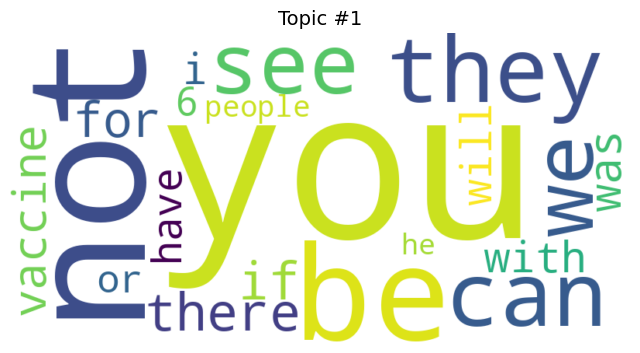

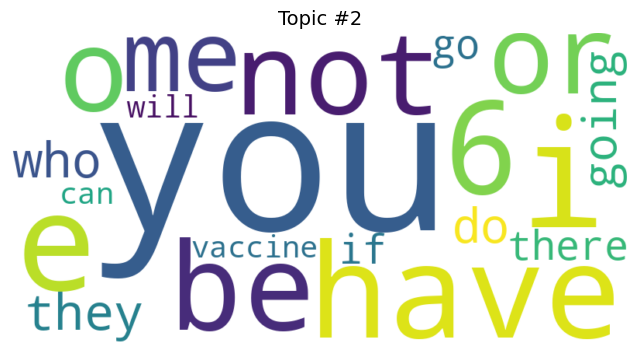

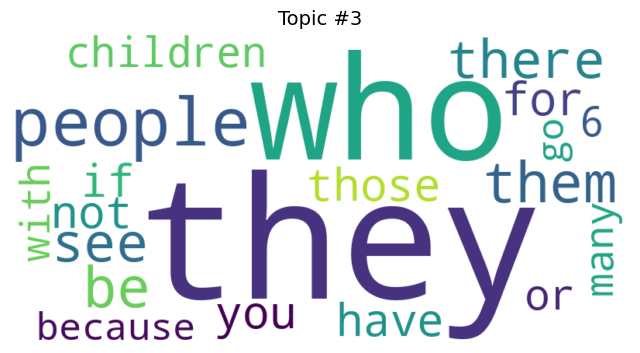

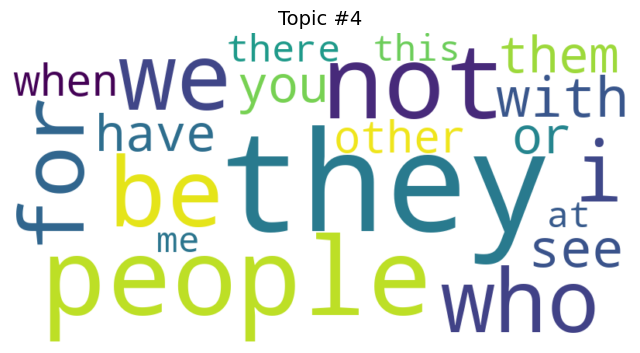

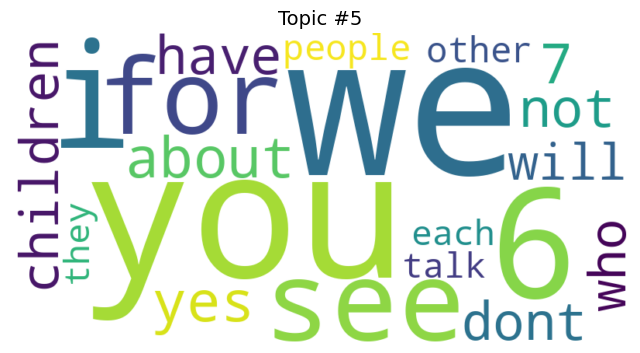


 Coherence Scores:
  LDA Baseline Coherence (c_v):    0.3509
  LDA Baseline Coherence (UMass):  -1.4043
  LDA Baseline Coherence (NPMI):   -0.0123
  LDA Baseline Perplexity:         -6.5915


In [6]:
# !pip install -U gensim nltk

import pandas as pd
import string
import nltk
import gensim
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

# Clean and tokenize text (basic, no stopword removal)
def clean_text(text):
    if pd.isnull(text): return []
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)

df['tokens'] = df['Unnamed: 5'].apply(clean_text)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=20, random_state=42)

# Print topics
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"🔸 Topic {idx+1}: {topic}")


# Visualize each topic with WordCloud
for i in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title(f"Topic #{i+1}", fontsize=14)

    # Get topic words and their weights
    topic_words = dict(lda_model.show_topic(i, topn=20))  # top 20 words per topic

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


# Evaluate coherence and perplexity
coherence_cv = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_npmi').get_coherence()
perplexity = lda_model.log_perplexity(corpus)


# Print evaluation scores
print("\n Coherence Scores:")
print(f"  LDA Baseline Coherence (c_v):    {coherence_cv:.4f}")
print(f"  LDA Baseline Coherence (UMass):  {coherence_umass:.4f}")
print(f"  LDA Baseline Coherence (NPMI):   {coherence_npmi:.4f}")
print(f"  LDA Baseline Perplexity:         {perplexity:.4f}")


LDA Improved with stemming + TF-IDF


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



 LDA Topics (Top 10 Words per Topic):

🔸 Topic #1: people time vaccine make let dont kohid vaccinated sure important
🔸 Topic #2: going child people yes time good dont mother important bad
🔸 Topic #3: child let vaccine need people say dont kohid second said
🔸 Topic #4: child people vaccine dont yes jonson middle going say let
🔸 Topic #5: people child say vaccine good week make let body dont


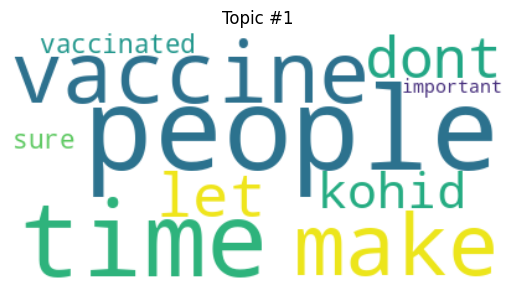

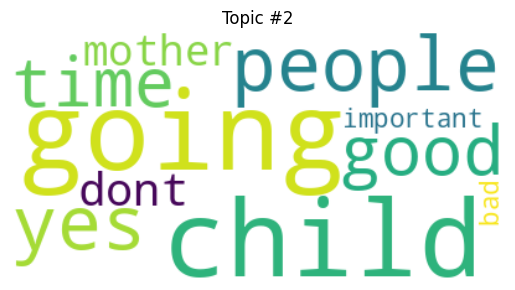

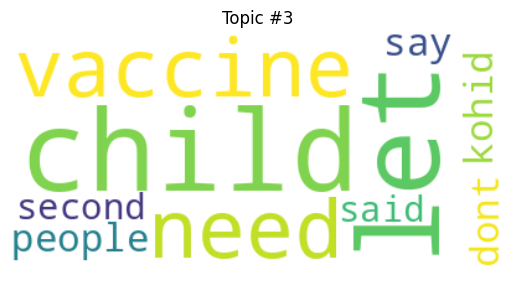

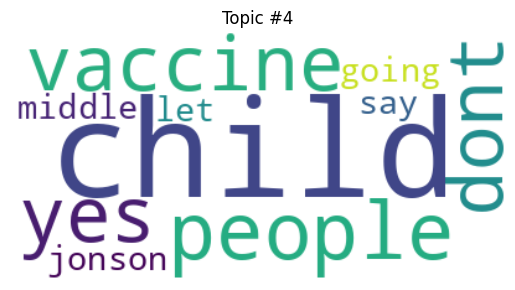

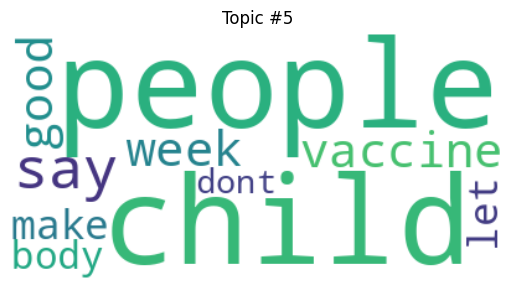


 Evaluation Metrics:
  Coherence (c_v):     0.3043
  Coherence (u_mass):  -2.9177
  Coherence (c_npmi):  -0.1265
  Perplexity:          -6.5915


In [9]:
# !pip install -U gensim nltk scikit-learn wordcloud matplotlib

import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

# Preprocessing for coherence evaluation (tokens)
def tokenize_for_coherence(text):
    if pd.isnull(text): return []
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)

df['tokens'] = df['Unnamed: 5'].apply(tokenize_for_coherence)

# Preprocessing for model input (lemmatization + stopword removal)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if pd.isnull(text): return ''
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return ' '.join([
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and len(word) > 2
    ])

df['cleaned'] = df['Unnamed: 5'].apply(preprocess)

# feature_names = tfidf_vectorizer.get_feature_names_out()

from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer instead of TF-IDF
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = vectorizer.fit_transform(df['cleaned'])
feature_names = vectorizer.get_feature_names_out()

# Fit LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X_counts)

# Display Topics
topics = []
print("\n LDA Topics (Top 10 Words per Topic):\n")
for topic_idx, topic_weights in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic_weights.argsort()[:-11:-1]]
    topics.append(top_words)
    print(f"🔸 Topic #{topic_idx + 1}: {' '.join(top_words)}")

#  WordClouds
for i, topic in enumerate(topics):
    wordcloud = WordCloud(background_color='white').generate(' '.join(topic))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

# Evaluation (Coherence + Perplexity)
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

coherence_cv = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='c_npmi').get_coherence()

# Note: sklearn's `.perplexity()` is a rough proxy on TF-IDF
# perplexity = lda_model.perplexity(X_tfidf)
# perplexity = lda_model.log_perplexity(corpus)

# Print Results
print("\n Evaluation Metrics:")
print(f"  Coherence (c_v):     {coherence_cv:.4f}")
print(f"  Coherence (u_mass):  {coherence_umass:.4f}")
print(f"  Coherence (c_npmi):  {coherence_npmi:.4f}")
print(f"  Perplexity:          {perplexity:.4f}")


Basic NMF on English Transcriptions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🔸 Topic 1: are they who that people those them and to see
🔸 Topic 2: you to if your are do or will can dont
🔸 Topic 3: is that it to be there vaccine not he can
🔸 Topic 4: of we in and to middle about africa people yes


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


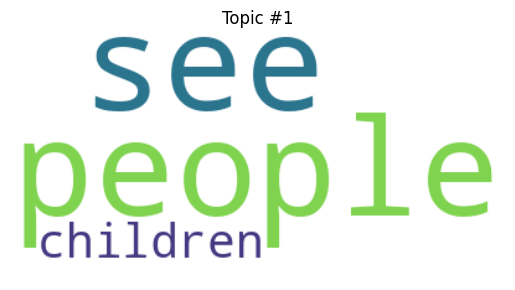

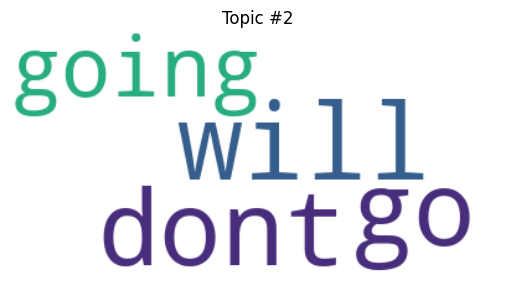

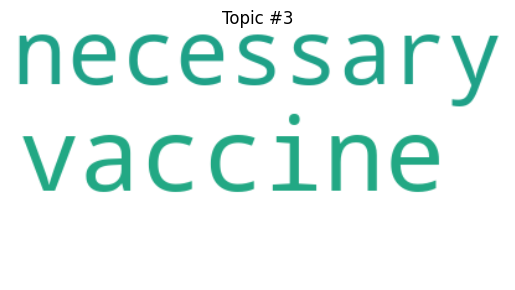

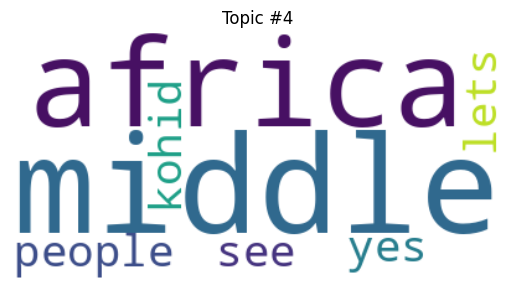


 Basic TF-IDF + NMF Coherence Scores:
  Coherence (c_v):    0.4822
  Coherence (u_mass): -1.1957
  Coherence (c_npmi): 0.0204
  NMF Reconstruction Error: 28.9008


In [10]:
# !pip install -U gensim nltk scikit-learn wordcloud matplotlib

import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

# Only lowercase and remove punctuation (no stopwords, no lemmatization)
def basic_clean(text):
    if pd.isnull(text): return ''
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned'] = df['Unnamed: 5'].apply(basic_clean)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf.fit_transform(df['cleaned'])
feature_names = tfidf.get_feature_names_out()

# Train NMF
nmf = NMF(n_components=4, random_state=1)
nmf.fit(X)

# Print topics
def print_topics(model, feature_names, n_top_words=10):
    for i, topic in enumerate(model.components_):
        print(f"🔸 Topic {i+1}: {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")

print_topics(nmf, feature_names)

# WordClouds
for i, topic in enumerate(nmf.components_):
    wc = WordCloud(background_color='white').generate(' '.join([feature_names[j] for j in topic.argsort()[:-15 - 1:-1]]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

# Evaluation
tokens = df['cleaned'].apply(word_tokenize)
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(t) for t in tokens]

# Prepare topics for CoherenceModel
topics = []
for topic in nmf.components_:
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(top_words)

# Compute coherence
coherence_cv = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='c_npmi').get_coherence()

# Output
print("\n Basic TF-IDF + NMF Coherence Scores:")
print(f"  Coherence (c_v):    {coherence_cv:.4f}")
print(f"  Coherence (u_mass): {coherence_umass:.4f}")
print(f"  Coherence (c_npmi): {coherence_npmi:.4f}")
print(f"  NMF Reconstruction Error: {nmf.reconstruction_err_:.4f}")


TF-IDF + NMF (Improved) on English Transcripts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


🔸 Topic 1: see going dont one yes let like say time middle
🔸 Topic 2: child school year father disease expect care take mother vaccinated
🔸 Topic 3: vaccine johnson jonson administered use yes sure injection let time
🔸 Topic 4: people many africa show live make get important middle kohid


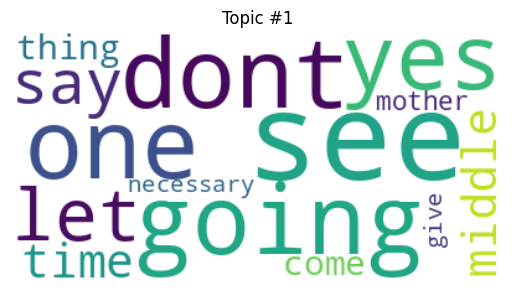

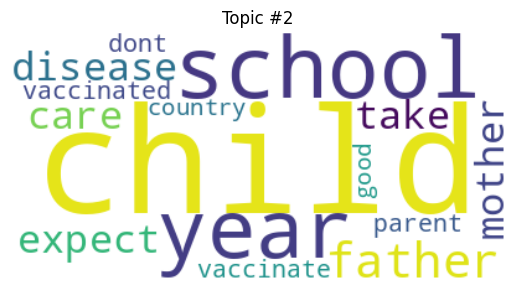

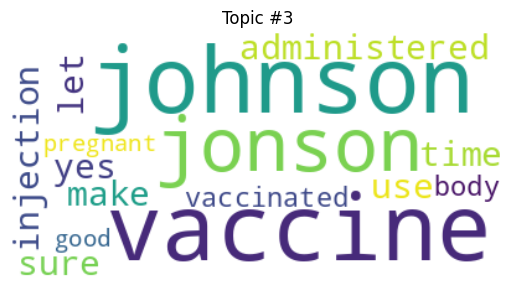

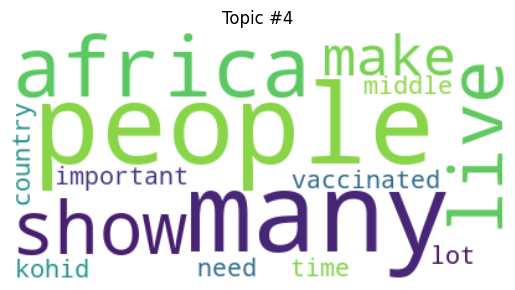


 Coherence Scores:
  Coherence (c_v):    0.4100
  Coherence (u_mass): -2.6088
  Coherence (c_npmi): 0.0016
  NMF Reconstruction Error: 29.9794


In [11]:
# !pip install -U gensim nltk scikit-learn wordcloud matplotlib

import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean + lemmatize text
def clean_and_lemmatize(text):
    if pd.isnull(text):
        return ''
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['cleaned'] = df['Unnamed: 5'].apply(clean_and_lemmatize)

# TF-IDF
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf.fit_transform(df['cleaned'])
feature_names = tfidf.get_feature_names_out()

# Train NMF model
nmf = NMF(n_components=4, random_state=1)
nmf.fit(X)

# Print topics
def print_topics(model, feature_names, n_top_words=10):
    for i, topic in enumerate(model.components_):
        print(f"🔸 Topic {i+1}: {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")

print_topics(nmf, feature_names)

# WordClouds
for i, topic in enumerate(nmf.components_):
    wc = WordCloud(background_color='white').generate(' '.join([feature_names[j] for j in topic.argsort()[:-15 - 1:-1]]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

# Evaluation: Tokenize for coherence
tokens = df['cleaned'].apply(word_tokenize)
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

# Top topic words for coherence (Gensim expects lists of words)
topics = []
for topic in nmf.components_:
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(top_words)

# Coherence metrics
coherence_cv = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(topics=topics, texts=tokens, dictionary=dictionary, coherence='c_npmi').get_coherence()

# Print scores
print("\n Coherence Scores:")
print(f"  Coherence (c_v):    {coherence_cv:.4f}")
print(f"  Coherence (u_mass): {coherence_umass:.4f}")
print(f"  Coherence (c_npmi): {coherence_npmi:.4f}")
print(f"  NMF Reconstruction Error: {nmf.reconstruction_err_:.4f}")
